In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import yfinance as yf

In [3]:
stock_data=yf.download('AAPL',start='2010-01-01',end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [87]:
ma100=stock_data.Close.rolling(100,min_periods=0).mean()
ma100

Date
2010-01-04      7.643214
2010-01-05      7.649822
2010-01-06      7.611429
2010-01-07      7.588750
2010-01-08      7.585143
                 ...    
2020-12-23    118.000475
2020-12-24    118.223525
2020-12-28    118.489800
2020-12-29    118.699475
2020-12-30    118.925550
Name: Close, Length: 2768, dtype: float64

In [89]:
ma200=stock_data.Close.rolling(200).mean()
ma200
ma20=stock_data.Close.rolling(20).mean()
ma20

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2020-12-23    124.106000
2020-12-24    124.903000
2020-12-28    125.908001
2020-12-29    126.699000
2020-12-30    127.249000
Name: Close, Length: 2768, dtype: float64

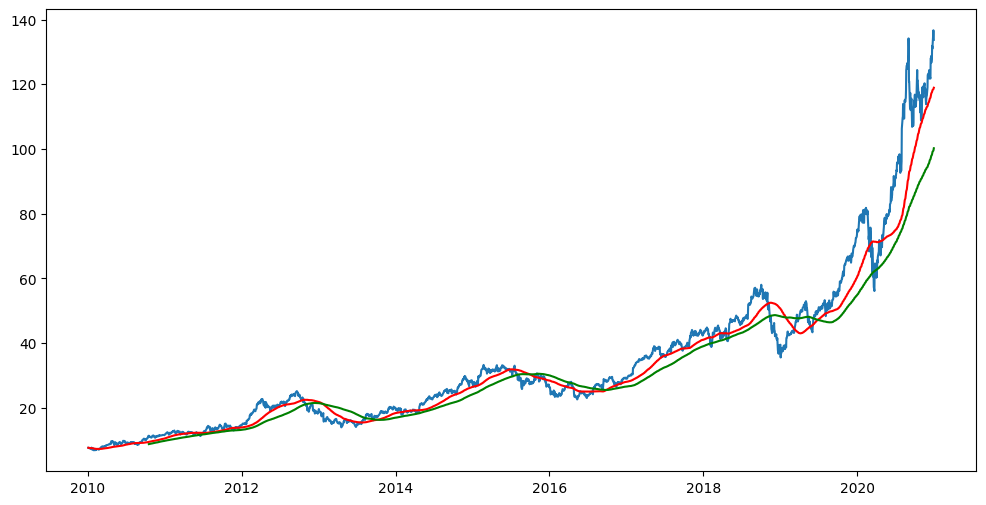

In [91]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
#plt.plot(ma20,'b')

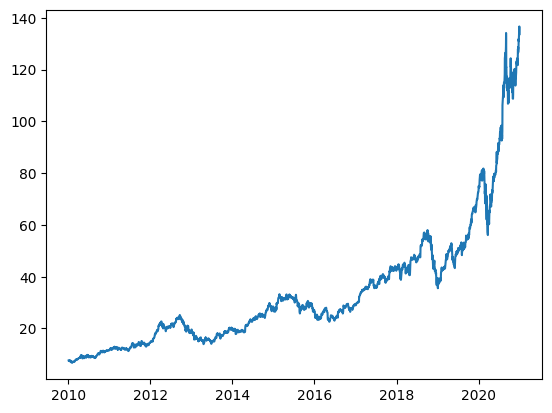

In [7]:
plt.plot(stock_data.Close)

In [8]:
training_data=pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
testing_data=pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):int(len(stock_data))])


In [9]:
print(training_data.shape)
print(testing_data.shape)


(1937, 1)
(831, 1)


In [10]:
training_data.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [11]:
testing_data.head()

,Close
Date,
2017-09-13,39.912498
2017-09-14,39.570000
2017-09-15,39.970001
2017-09-18,39.667500
2017-09-19,39.682499


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
training_data_array=scaler.fit_transform(training_data)
training_data_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [17]:
x_train=[]
y_train=[]
for i in range (100,training_data.shape[0]):
    x_train.append(training_data_array[i-100:i])
    y_train.append(training_data_array[i:0])
x_train=np.array(x_train)
y_train=np.array(y_train)


In [18]:
from keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [19]:
models=Sequential()

In [21]:
print(x_train.shape)  
print(y_train.shape)

(1837, 100, 1)
(1837, 0, 1)


In [22]:
models.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
models.add(Dropout(0.2))
models.add(LSTM(units=60,activation='relu',return_sequences=True))
models.add(Dropout(0.3))
models.add(LSTM(units=80,activation='relu',return_sequences=True))
models.add(Dropout(0.4))
models.add(LSTM(units=120,activation='relu'))
models.add(Dropout(0.5))
models.add(Dense(units=1)) 

In [23]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
models.compile(optimizer='adam', loss='mean_squared_error')
models.fit(x_train, y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 10s 120ms/step - loss: nan
Epoch 2/50
58/58 [==============================] - 7s 120ms/step - loss: nan
Epoch 3/50
58/58 [==============================] - 7s 116ms/step - loss: nan
Epoch 4/50
58/58 [==============================] - 7s 115ms/step - loss: nan
Epoch 5/50
58/58 [==============================] - 7s 115ms/step - loss: nan
Epoch 6/50
58/58 [==============================] - 7s 116ms/step - loss: nan
Epoch 7/50
58/58 [==============================] - 7s 117ms/step - loss: nan
Epoch 8/50
58/58 [==============================] - 7s 116ms/step - loss: nan
Epoch 9/50
58/58 [==============================] - 7s 116ms/step - loss: nan
Epoch 10/50
58/58 [==============================] - 7s 117ms/step - loss: nan
Epoch 11/50
58/58 [==============================] - 7s 117ms/step - loss: nan
Epoch 12/50
58/58 [==============================] - 7s 118ms/step - loss: nan
Epoch 13/50
58/58 [==============================] - 7s 119m

In [25]:
models.save('stockmodel.h5')

In [26]:
training_data.tail(100)

,Close
Date,
2017-04-21,35.567501
2017-04-24,35.910000
2017-04-25,36.132500
2017-04-26,35.919998
2017-04-27,35.947498
...,...
2017-09-06,40.477501
2017-09-07,40.314999
2017-09-08,39.657501


In [27]:
past_100_days=training_data.tail(100)

In [28]:
final_df=past_100_days.append(testing_data,ignore_index=True)

C:\Users\sejal\AppData\Local\Temp\ipykernel_16328\1305371429.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(testing_data,ignore_index=True)


In [29]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [30]:
input_data=scaler.fit_transform(final_df)

In [31]:
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [32]:
input_data.shape

(931, 1)

In [74]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [75]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [76]:
y_predicted=models.predict(x_test)
y_predicted.shape

26/26 [==============================] - 1s 35ms/step


(831, 1)

In [77]:
y_predicted

array([[0.00071404],
       [0.00072113],
       [0.00072616],
       [0.00072922],
       [0.0007304 ],
       [0.00072984],
       [0.0007274 ],
       [0.00072258],
       [0.00071485],
       [0.00070382],
       [0.00068973],
       [0.00067328],
       [0.00065524],
       [0.00063651],
       [0.00061786],
       [0.00059993],
       [0.00058299],
       [0.0005675 ],
       [0.00055383],
       [0.00054225],
       [0.00053286],
       [0.00052573],
       [0.00052076],
       [0.00051782],
       [0.00051715],
       [0.00051904],
       [0.0005234 ],
       [0.00052943],
       [0.00053623],
       [0.000543  ],
       [0.00054933],
       [0.00055494],
       [0.00055979],
       [0.00056479],
       [0.00057143],
       [0.00058124],
       [0.00059489],
       [0.0006125 ],
       [0.00063449],
       [0.00066112],
       [0.00069226],
       [0.00072753],
       [0.00076621],
       [0.00080716],
       [0.00084903],
       [0.00089014],
       [0.00092868],
       [0.000

In [79]:
scaler.scale_

array([0.00988704])

In [80]:
scaler_factor=1/0.00988704

In [81]:
y_test=y_test*scaler_factor
y_predicted=y_predicted*scaler_factor

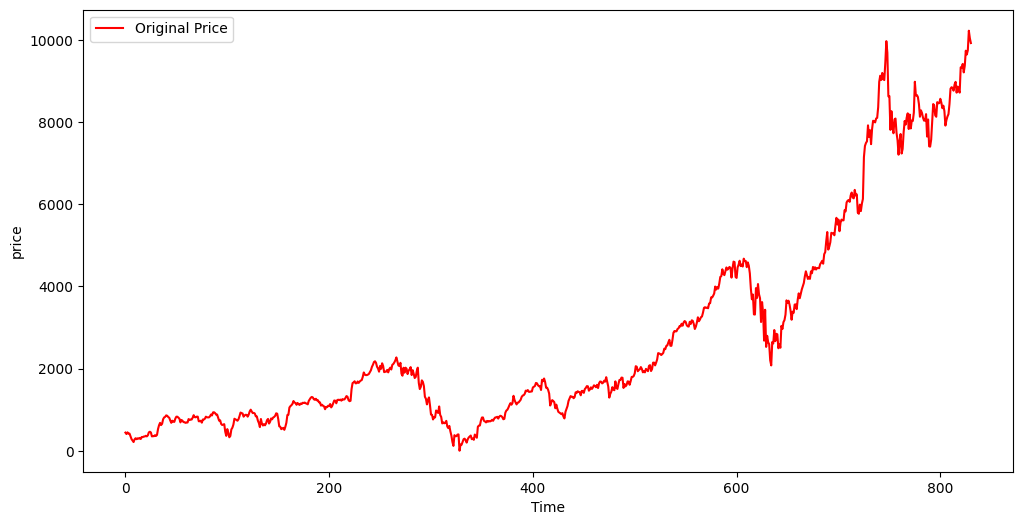

In [82]:
plt.figure(figsize=(12,6))
plt.plot(y_test ,'r',label='Original Price')

plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

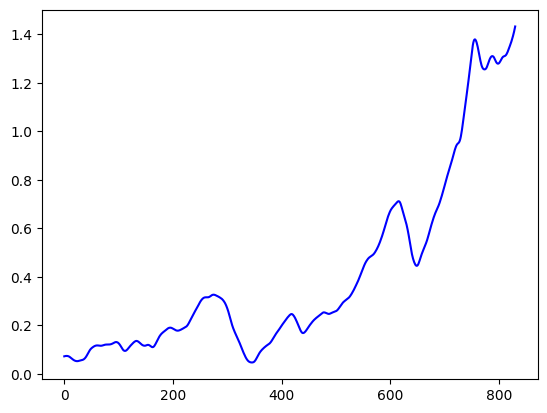

In [66]:
plt.plot(y_predicted,'b',label='Predicted Price')


In [83]:
Scaler=MinMaxScaler(feature_range=(0,10000))
y_predicted=Scaler.fit_transform(y_predicted)

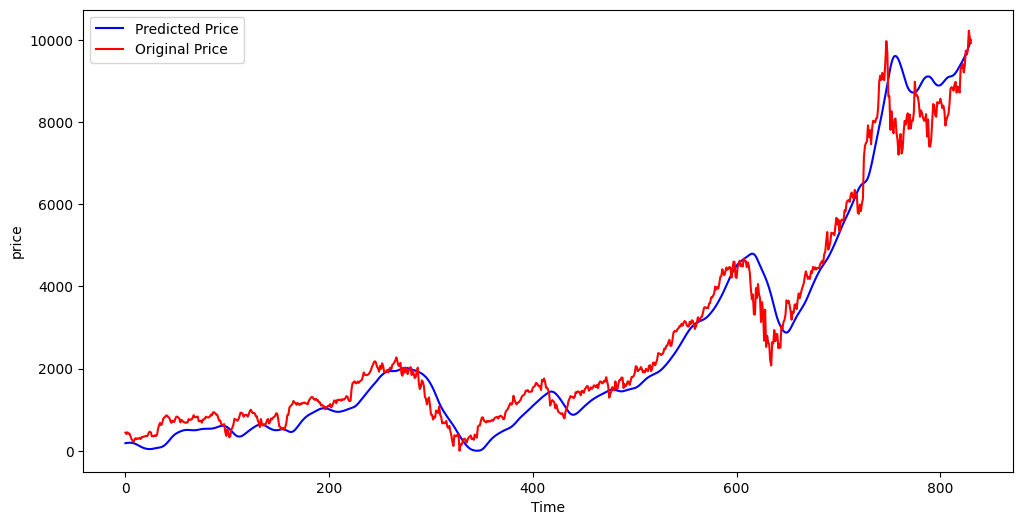

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'b',label='Predicted Price')
plt.plot(y_test,'r',label='Original Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()